In [2]:
#Step1. 데이터 정보 확인 및 로드하기
#Step1-1. Data Set Description
heart_names=open('heart-disease.names','r', encoding='UTF8')
heart_n=heart_names.readlines()
for heart_name_line in heart_n:
    print(heart_name_line)

Publication Request: 

   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

   This file describes the contents of the heart-disease directory.



   This directory contains 4 databases concerning heart disease diagnosis.

   All attributes are numeric-valued.  The data was collected from the

   four following locations:



     1. Cleveland Clinic Foundation (cleveland.data)

     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)

     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)

     4. University Hospital, Zurich, Switzerland (switzerland.data)



   Each database has the same instance format.  While the databases have 76

   raw attributes, only 14 of them are actually used.  Thus I've taken the

   liberty of making 2 copies of each database: one with all the attributes

   and 1 with the 14 attributes actually used in past experiments.



   The authors of the databases have requested:



      ...that any publications resultin

In [3]:
#In particular, the Cleveland database is the only one 
#that has been used by ML researchers tothis date.
#One file has been "processed", that one containing the Cleveland database. 
#All four unprocessed files also exist in this directory.

#위와 같은 Data Set Information이 있었으므로 
#'processed.cleveland.data' 파일을 이용하여 분석할 계획

In [50]:
#Step1-2. install library
import numpy as np

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams

import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn import  preprocessing

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Step1-3.load data
data=pd.read_csv('processed.cleveland.data', 
                 names=['age','sex','cp','trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], header=None)

#해당 데이터에 변수명 없이 관측치만 입력되어 있었기에 변수명 추가

In [6]:
#Step2. Data 확인하기
#Step2-1. Data 요약(다양한 통계량 확인)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [7]:
#Step2-2.data 구조 확인
data.shape

(303, 14)

In [8]:
data.columns
#입력한 변수명 확인

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
#Step2-3. data 변수 확인
data.info()
#결측값이 없는 data set임을 확인
#각 데이터의 type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [10]:
#Step2-3. data 형태 확인하기
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [11]:
#Step3.데이터 전처리
#heart diseases type 1~4 into 1(=presesnce of heart diseases)
#absence / presence 분석을 위해 1~4까지의 값을 하나의 범주로 묶음
data.loc[data['num']>0,'num']=1

In [45]:
#object type into numeric  type
data.ca=pd.to_numeric(data.ca,errors='coerce').fillna(0)
data.thal=pd.to_numeric(data.thal,errors='coerce').fillna(0)

Text(0.5, 0, '')

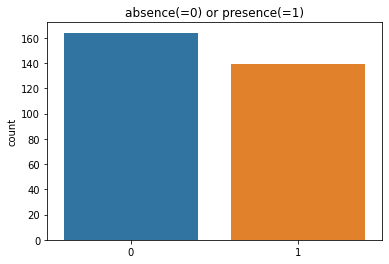

In [12]:
#Step4. Heart-Disease analysis
#심장병 발현 유무 확인
f=sns.countplot(x='num', data=data)
f.set_title("absence(=0) or presence(=1)")
f.set_xticklabels(['0','1'])
plt.xlabel("")

Text(0.5, 0, '')

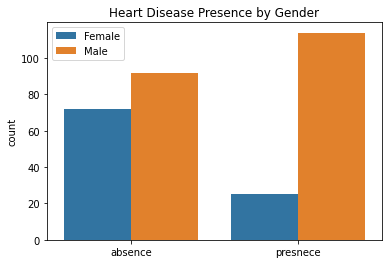

In [13]:
#나이와 심장질환 관계
f=sns.countplot(x='num', data=data,hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart Disease Presence by Gender")
f.set_xticklabels(['absence','presnece'])
plt.xlabel("")

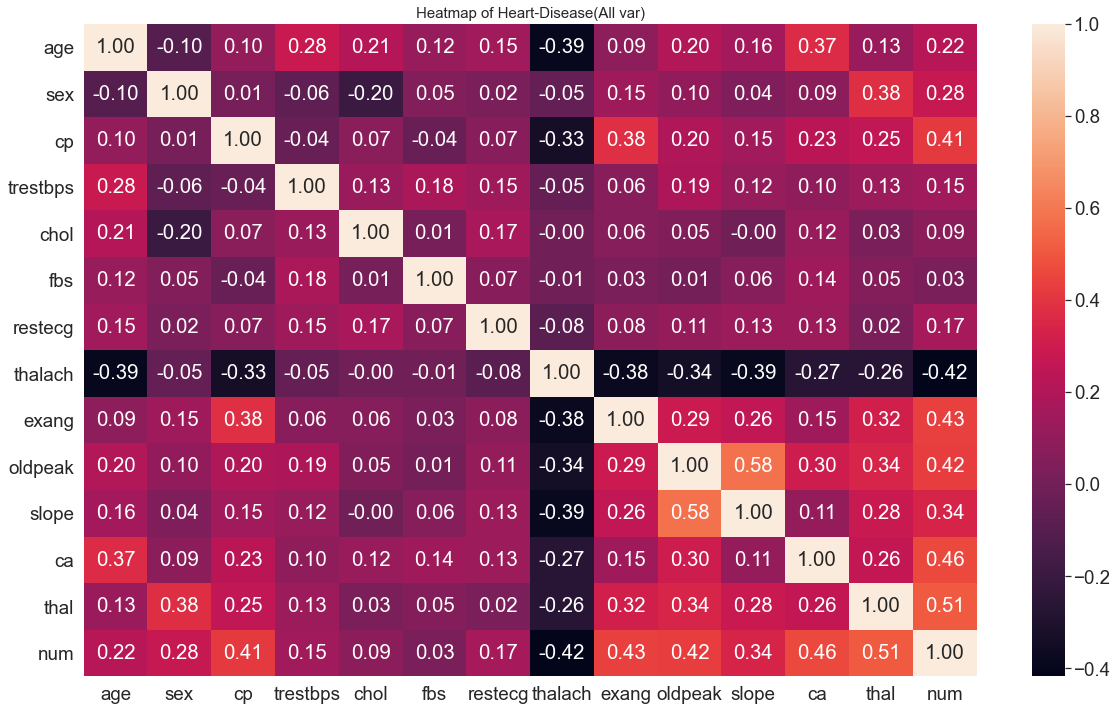

In [59]:
#심장병 발현 유무와 다른 13개의 변수 간의 상관관계 관측
#1에 가까울수록 관계가 크고 -1에 가까울수록 관계성이 적다 >> 라고 해석
#num(심장병 발현 유무)는 cp, exang, oldpeak 3개의 변수와 가장 상관관계가 크다. 

sns.set(style='whitegrid',font_scale=1.7)
rcParams['figure.figsize']=20,12

heatmap_corr=sns.heatmap(data.corr(method='pearson'),annot=True, fmt='.2f') #annot=True >> 각 셀에 숫자 입력
plt.title('Heatmap of Heart-Disease(All var)', fontsize=15)
plt.show()


In [92]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128340,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.378155,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.254161,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134311,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.025190,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.053608,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.023822,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.263384,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.316134,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.341416,0.424510


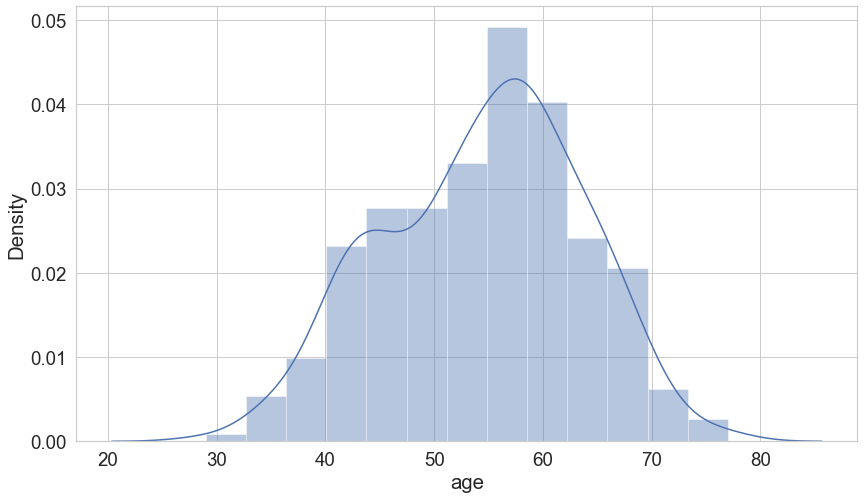

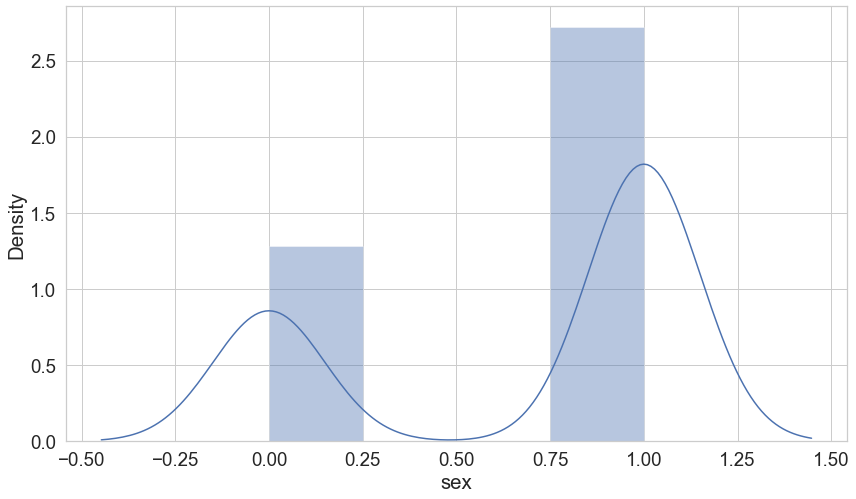

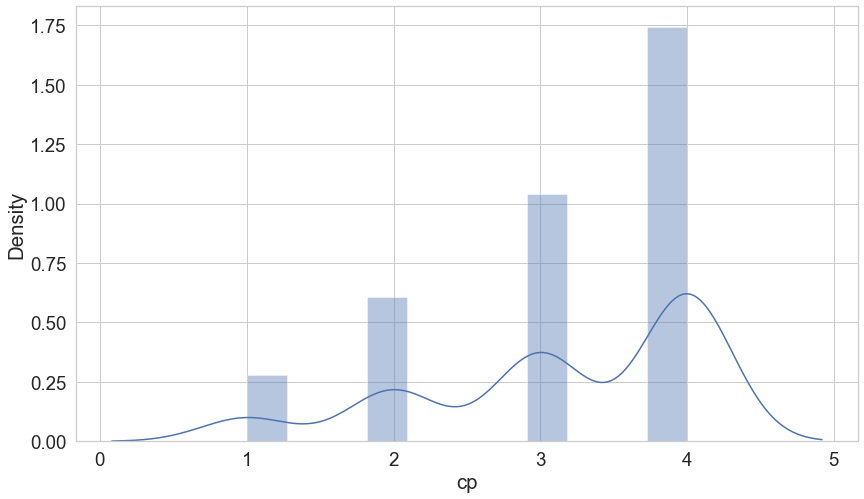

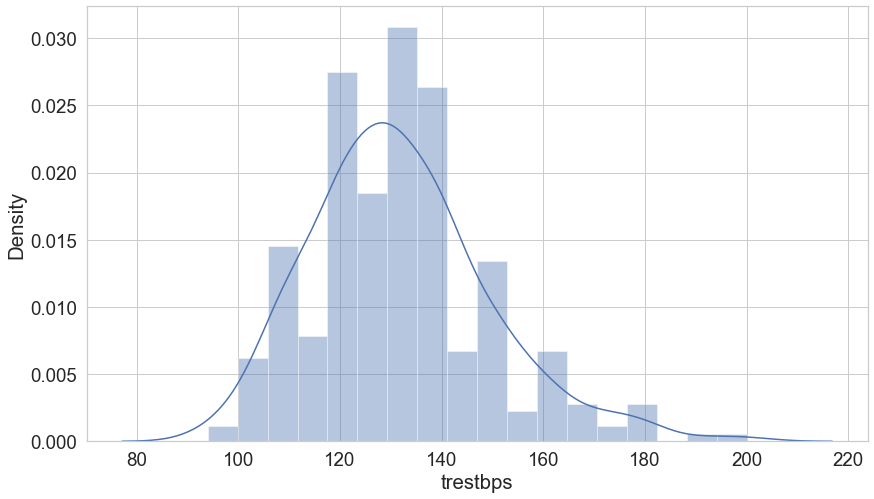

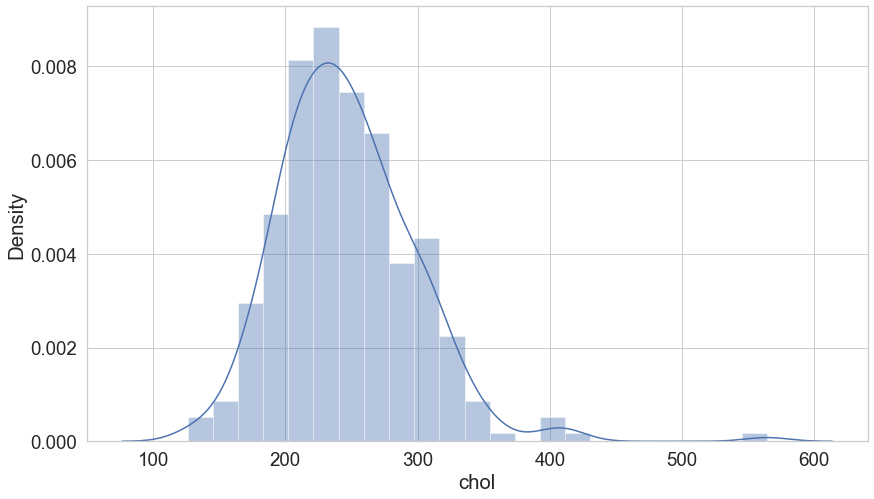

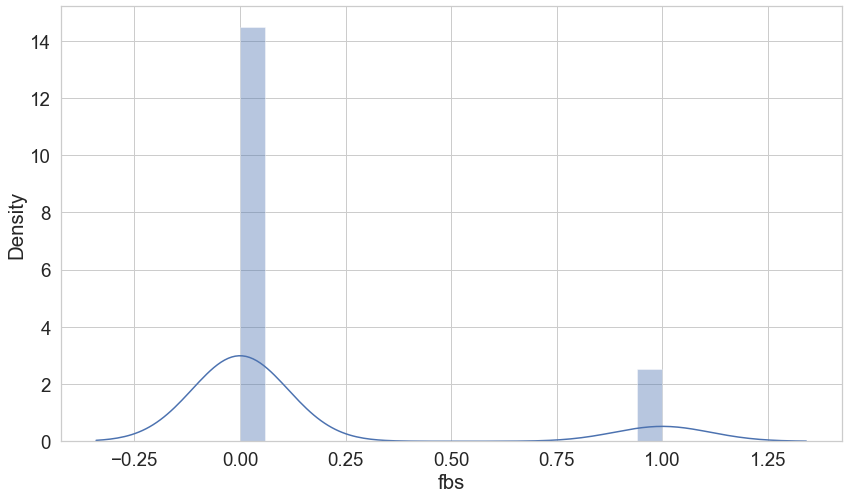

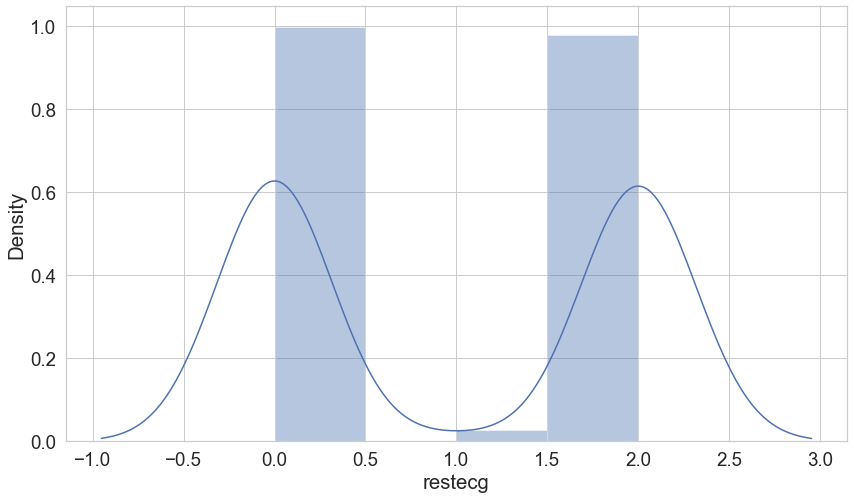

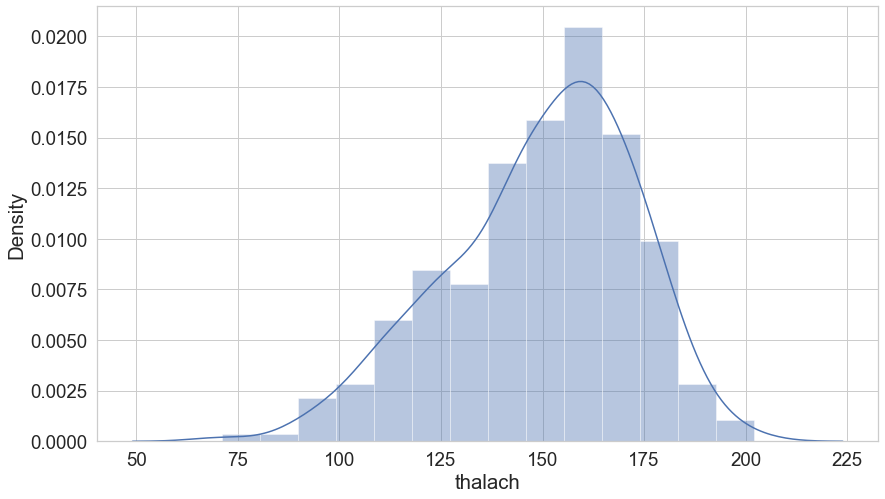

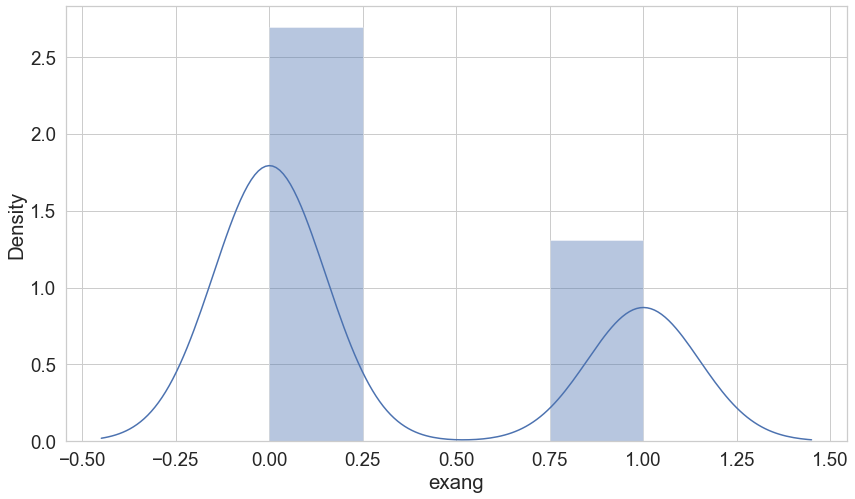

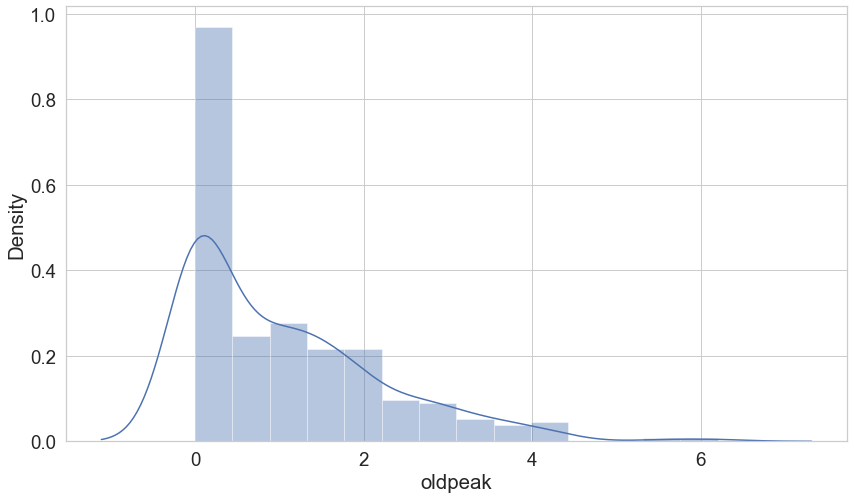

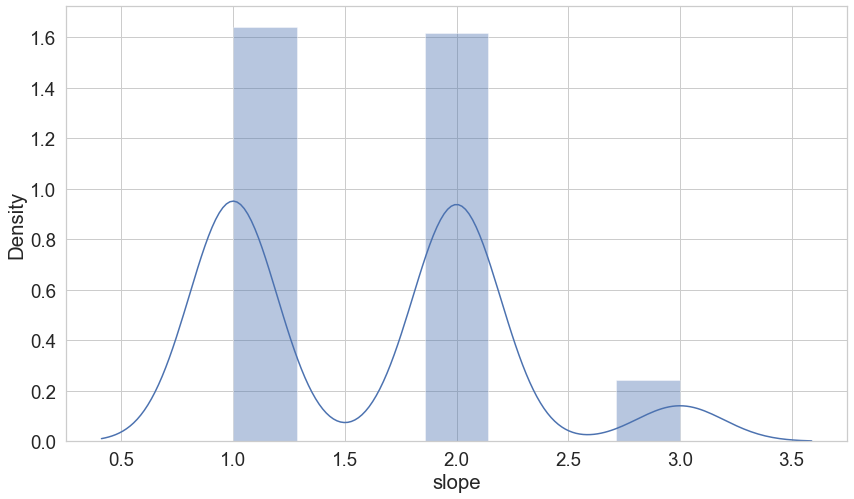

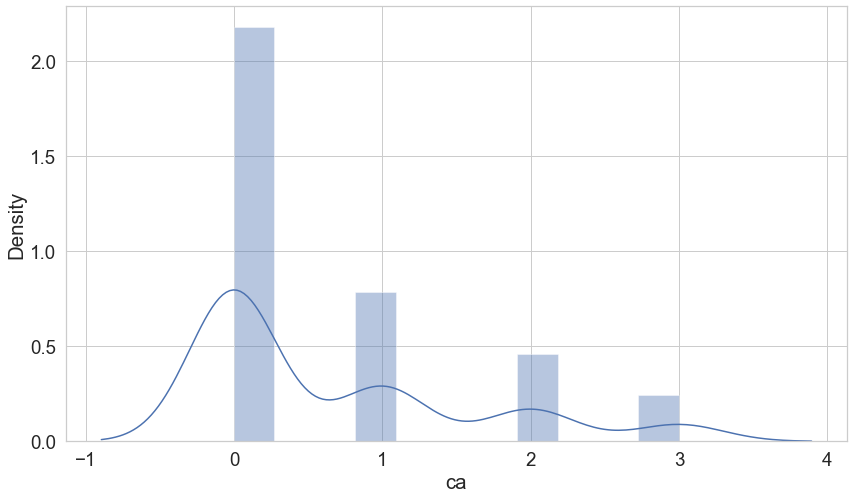

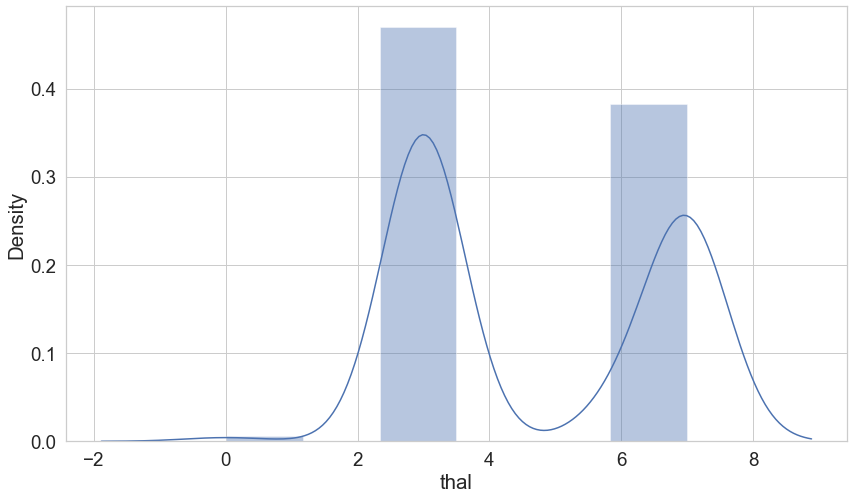

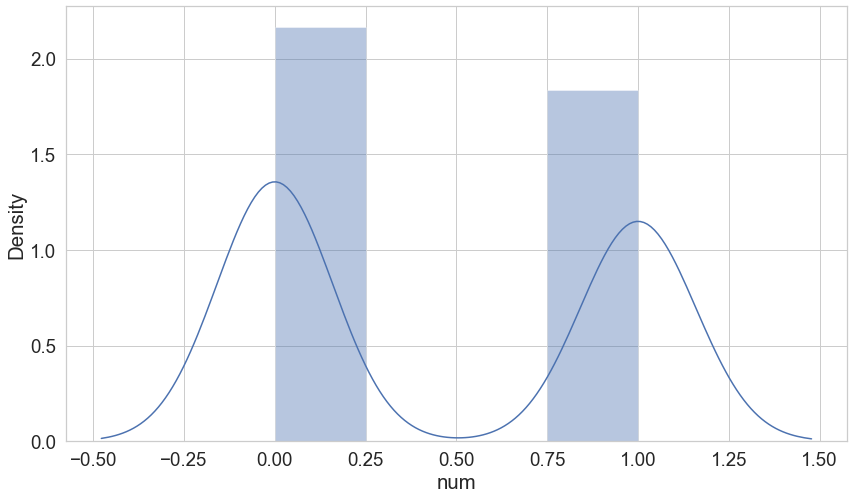

In [55]:
for feature in data:
    sns.distplot(data[feature])
    plt.show()

In [62]:
#Step5. Modeling
#PCA(overfiting)> SVC, Logistic Regression, Decision Tree Classification
x=data.drop(['num'],axis=1)
y=data['num']

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
#normalization
normal_x=(x-np.min(x))/(np.max(x))-np.min(x)

train_x, test_x, train_y, test_y=train_test_split(normal_x,y, test_size=0.4,random_state=42)
print('test_x : ', test_x.shape)
print('train_x : ', train_x.shape)

test_x :  (122, 13)
train_x :  (181, 13)


In [194]:
#predict overfitting (+remove noise)>> PCA
from sklearn.decomposition import PCA

pca=PCA().fit(train_x)
print(pca.explained_variance_ratio_)
print(train_x.columns.values.tolist())
print(pca.components_)

[0.26799792 0.221224   0.16785482 0.09902402 0.07710861 0.04946654
 0.03975251 0.03555287 0.01409945 0.0119135  0.00676982 0.00523545
 0.0040005 ]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[[ 3.27403882e-02  5.68722110e-01  1.61122964e-01  2.15183788e-02
  -2.38271105e-03  3.49573963e-02  2.28606729e-01 -6.85818000e-02
   6.52244166e-01  1.46503792e-01  1.08065324e-01  2.05217948e-01
   3.00314913e-01]
 [ 5.23279054e-02 -3.44993941e-01  6.05892547e-02  2.45601932e-02
   3.33722736e-02 -2.17499723e-02  9.17166047e-01 -1.97288483e-02
  -7.10090667e-02  2.53445749e-02  5.04512346e-02  1.38735830e-01
  -5.76156499e-02]
 [ 3.65588376e-02 -6.73461986e-01  1.97072785e-01  4.19967655e-03
   2.76651657e-02 -1.35487426e-01 -2.44833203e-01 -5.01795290e-02
   6.35727970e-01  4.26511336e-02  6.03626254e-02  5.92459946e-02
  -1.07474149e-01]
 [ 1.08830759e-01 -1.76655040e-01 -1.24342525e-02  7.07351995e-02
   1.46609260e-02  8.98

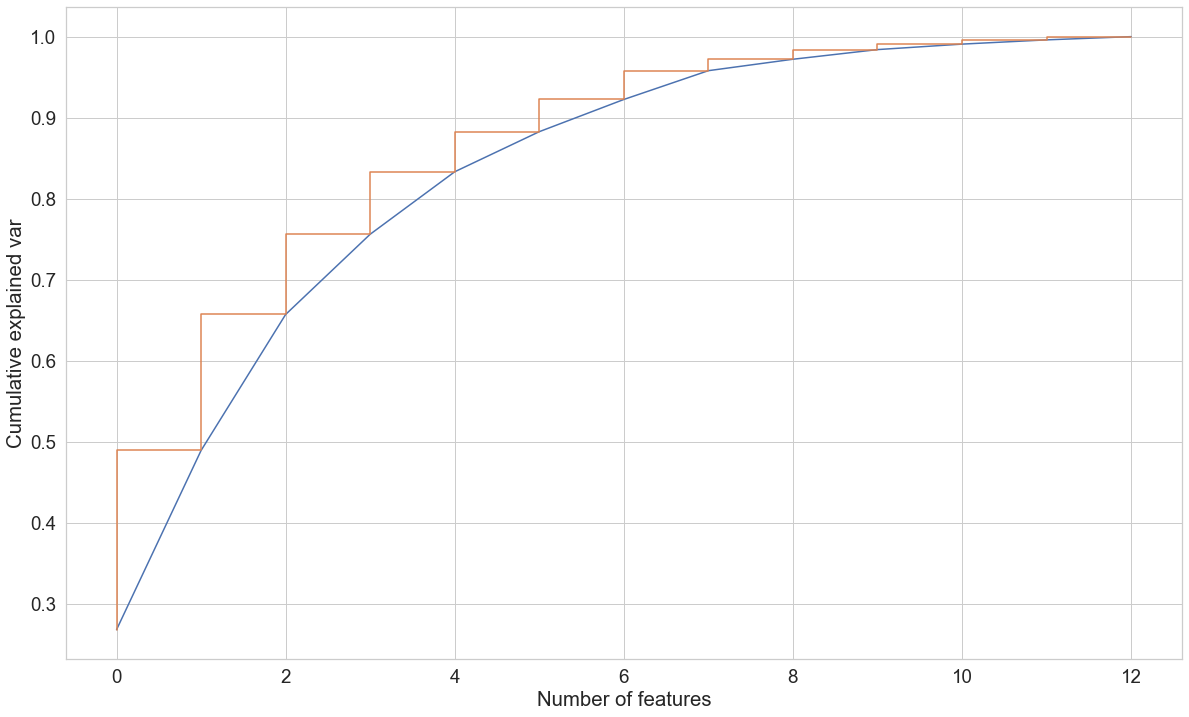

In [195]:
cumulative_data=np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_data)
plt.step([i for i in range(len(cumulative_data))], cumulative_data)
plt.xlabel('Number of features')
plt.ylabel('Cumulative explained var')
plt.show()

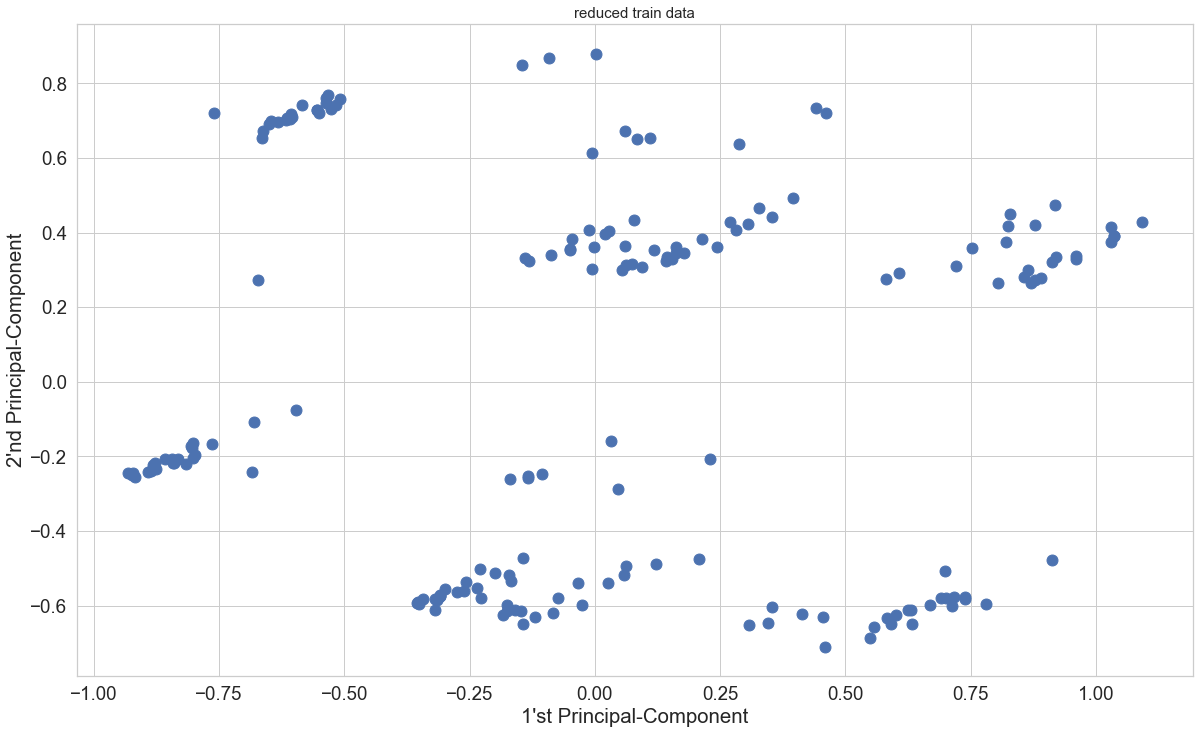

In [196]:
pca=PCA(n_components=5)
pca.fit(train_x)
reduced_train_data=pca.transform(train_x)

plt.scatter(reduced_train_data[:,0], reduced_train_data[:,1], 
            marker='o',alpha=1, s=120)
plt.title('reduced train data',fontsize=15)
plt.xlabel('1\'st Principal-Component')
plt.ylabel('2\'nd Principal-Component')
plt.show()

In [197]:
acc={}
#SVM, Random Forest Classifier, Logistic Regression, Decision Tree 4가지 모델의 정확도를 비교해볼 계획
#해당 모델들의 accuracy를 저장할 수 있는 공간 생성

In [198]:
#Step5-1. SVM(->SVC)
#분류와 회귀분석을 이용한 모델로 해당 모델을 이용하여 심장병 예측의 정확도를 확인해봄.
#SVM은 데이터를 구분하는 결정경계를 찾고 이를 기반으로 패턴을 인식한다.
#margin을 최대화할수록 좋은 결과를 얻었다고 할 수 있다. 
from sklearn import svm
model1=svm.SVC(C=1, kernel='poly', gamma='auto')
model1.fit(train_x,train_y)
model1_pred=model1.predict(test_x)
model1_acc=model1.score(test_x, test_y)
acc['SVC']=model1_acc

print("Accuracy of SVC : ", model1_acc)

Accuracy of SVC :  0.8032786885245902


In [199]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=1000, random_state=1)
model2.fit(train_x,train_y)
model2_pred=model2.predict(test_x)
model2_acc=model2.score(test_x, test_y)
acc['RandomForestClassifier']=model2_acc

print("Accuracy of RandomForestClassifier : ", model2_acc)

Accuracy of RandomForestClassifier :  0.8442622950819673


In [200]:
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
model3.fit(train_x,train_y)
model3_pred=model3.predict(test_x)
model3_acc=model3.score(test_x, test_y)
acc['LogisticRegression']=model3_acc

print("Accuracy of LogisticRegression : ", model3_acc)

Accuracy of LogisticRegression :  0.8524590163934426


In [201]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(train_x,train_y)
model4_pred=model4.predict(test_x)
model4_acc=model4.score(test_x, test_y)
acc['DecisionTreeClassifier']=model4_acc

print("Accuracy of DecisionTreeClassifier : ", model4_acc)

Accuracy of DecisionTreeClassifier :  0.8360655737704918


<AxesSubplot:xlabel='Accuracy of each model', ylabel='Model'>

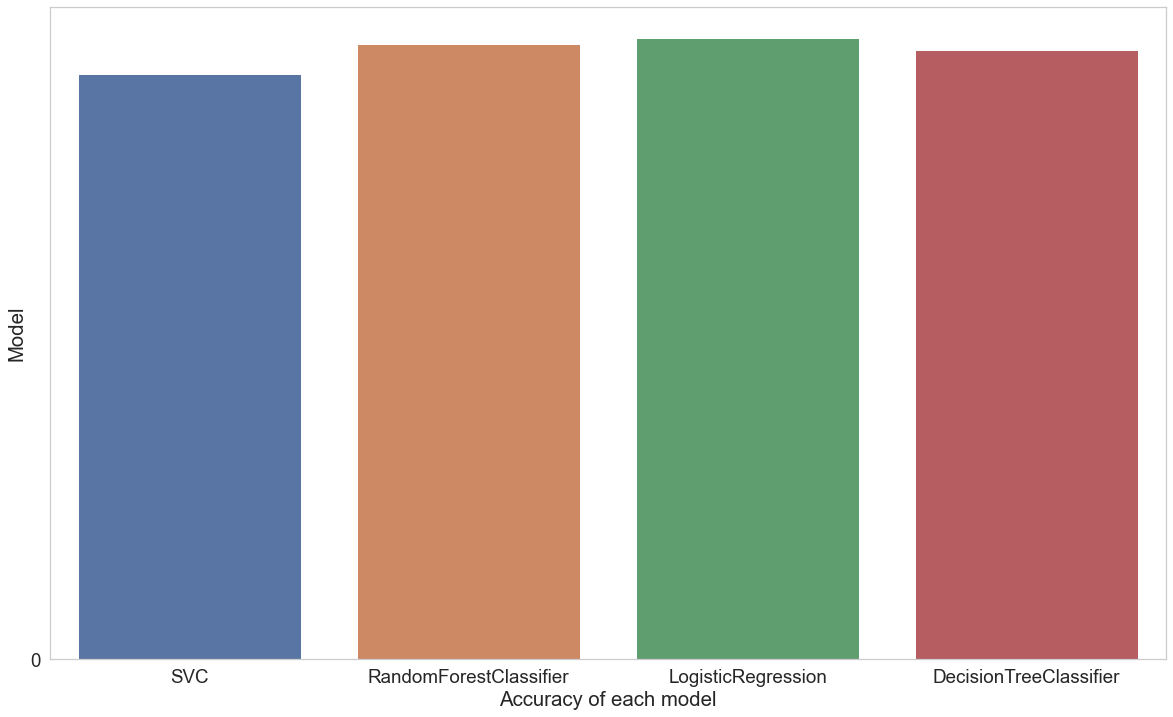

In [202]:
#Step6. Result
#4가지 모델에 관한 acc 비교
plt.figure(figsize=(20,12))
plt.xlabel("Accuracy of each model")
plt.ylabel("Model")
plt.yticks(np.arange(0,100,10))
sns.barplot(y=list(acc.values()),x=list(acc.keys()))

<AxesSubplot:title={'center':'DecisionTreeClassifier'}>

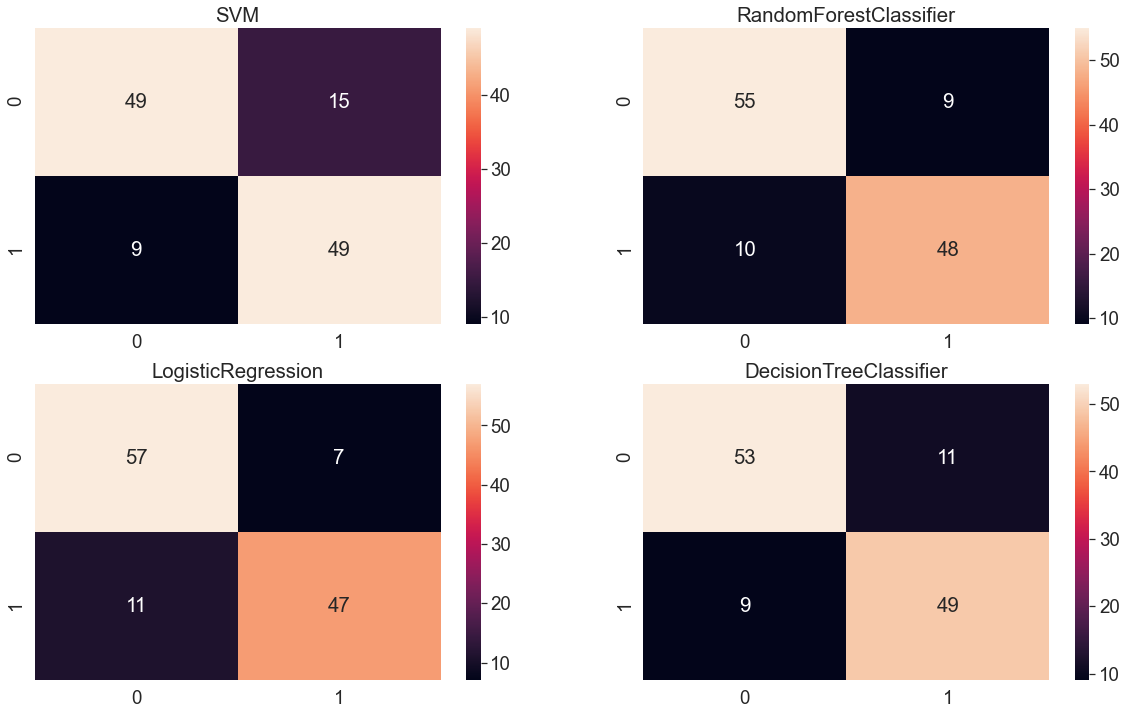

In [203]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model1=confusion_matrix(test_y, model1_pred)
confusion_matrix_model2=confusion_matrix(test_y, model2_pred)
confusion_matrix_model3=confusion_matrix(test_y, model3_pred)
confusion_matrix_model4=confusion_matrix(test_y, model4_pred)

plt.figure(figsize=(20,12))
plt.subplot(2,2,1) 
plt.title('SVM')
sns.heatmap(confusion_matrix_model1,annot=True)

plt.subplot(2,2,2)
plt.title('RandomForestClassifier')
sns.heatmap(confusion_matrix_model2,annot=True)

plt.subplot(2,2,3) 
plt.title('LogisticRegression')
sns.heatmap(confusion_matrix_model3,annot=True)

plt.subplot(2,2,4) 
plt.title('DecisionTreeClassifier')
sns.heatmap(confusion_matrix_model4,annot=True)
